# Aula 4: Pacote para dados tabulares

### Material de apoio:

- Livro online com exemplos e descrições sobre numpy, matplotlib e pandas: https://jakevdp.github.io/PythonDataScienceHandbook/
- Guia do usuário de Pandas: https://pandas.pydata.org/pandas-docs/stable/user_guide/


## Pandas: Pacote para dados tabulares

- pacote para analisar dados tabulares 
- muito utilizado para análise de séries temporais
- ciência de dados, aprendizado de máquina? Tem pandas!

**O que são dados tabulares?**

- dados estruturados
- colunas representam variáveis
- linhas são informações destas variáveis (observações/medições)
- compartilham o mesmo índice
- formatos:

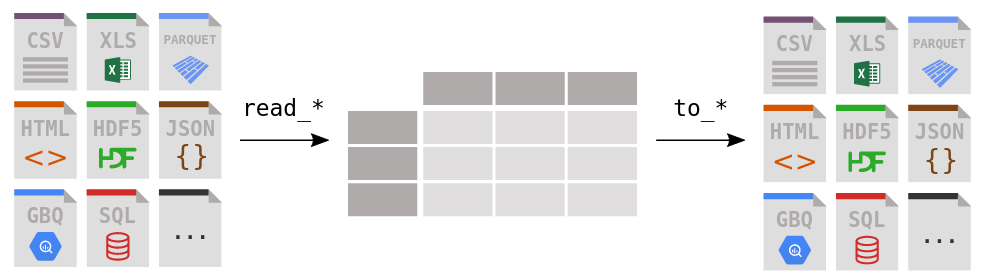

Fonte: Getting started do Pandas - https://pandas.pydata.org/docs/getting_started/index.html#getting-started

Conceitos importantes para utilizar o pandas

- Series: matriz 1D com um índice definido (perfil vertical)

- DataFrame: matriz 2D, com eixos rotulados que compartilham o mesmo índice (perfis vertical)

- Eixos: axis == 0 (rows) e axis == 1 (cols)

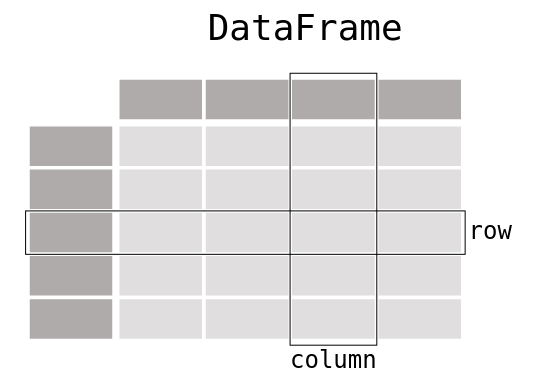

Fonte: Getting started do Pandas - https://pandas.pydata.org/docs/getting_started/index.html#getting-started

## Vamos ver algumas funcionalidade básicas

Criando objetos (Series e DataFrame):

- `data` para indicar os dados que serão armazenados na estrutura e
- `index` para apontar o indexamento que eles terão.

In [1]:
# linhas de códigos para evitar Warnings. Uso apenas para apresentações com o RISE para não ocupar espaço demais
# na tela.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# padrão de importação
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# criando um pd.Series
sr = pd.Series(data=np.random.randn(5), index=np.arange(0,5))

# criando um pd.DataFrame: notem o F maiúsculo
df = pd.DataFrame(data={'serie1': sr, 
                        'serie2': np.random.randn(5)},
                  
                  index=np.arange(0,5))
df

,serie1,serie2
0,2.145326,2.023460
1,-1.164238,-1.508157
2,-0.177459,0.656193
3,-0.957860,-0.281060
4,0.134546,2.109291


No entanto, é comum utilizar dicionários para criar DataFrame, pois podemos indicar também qual o nome de cada coluna (cabeçalho, header), ao passo que em Series não temos esta possibilidade:

In [3]:
pd.DataFrame(data={'coluna1': np.random.randn(10)}, index=range(10))

,coluna1
0,-0.827458
1,-1.332948
2,0.655996
3,1.357211
4,0.340381
5,-0.926966
6,-1.587015
7,-0.255668
8,0.970687
9,-0.842564


Utiliza-se o **pandas** para leitura de arquivos csv e planilhas excel, estruturando estes arquivos em um DataFrame organizado.

###  Revisitando aquele perfil de praia que ficou de exercício da aula passada

- retomando o conjunto de dados utilizados na aula anterior
- inserir em um Dataframe

In [4]:
perfil = np.loadtxt('../Dados/Perfil.csv', delimiter=',')
# perfil

In [5]:
# lista com com nomes que vamos dar as nossas colunas
colunas = ['Altura', 'Comprimento']
# lendo arquivo
df_perfil = pd.read_csv('../Dados/Perfil.csv', sep=',',
                      header=None, index_col=None, names=colunas)

df_perfil

,Altura,Comprimento
0,2.459516,0.000000
1,2.430612,12.483312
2,2.361571,24.966625
3,2.253177,37.449937
4,2.137680,49.933250
5,2.031411,62.416562
6,1.950376,74.899874
7,1.909881,87.383187
8,1.843392,99.866499
9,1.742976,112.349812


### Seleção de dados por rótulo e por posição

Motivos:

- explorar
- limpar

Como:

- `.loc[row, col]`
- `.iloc[nrow, ncol]`


Exemplos:

In [6]:
# o primeiro item deve ser a linha (neste caso todas)
# o segundo deve ser o nome das colunas
df_perfil.loc[:, ['Altura']]

,Altura
0,2.459516
1,2.430612
2,2.361571
3,2.253177
4,2.137680
5,2.031411
6,1.950376
7,1.909881
8,1.843392
9,1.742976


In [7]:
# acessar as informações por índices numéricos, tal qual o numpy
df_perfil.iloc[0,0] # 2.45

2.4595159107900004

In [8]:
# podemos configurar um index novo e argumento novo!
df_perfil.set_index('Comprimento', inplace=True)
df_perfil

,Altura
Comprimento,
0.000000,2.459516
12.483312,2.430612
24.966625,2.361571
37.449937,2.253177
49.933250,2.137680
62.416562,2.031411
74.899874,1.950376
87.383187,1.909881
99.866499,1.843392


In [9]:
# e podemos resetar o indice também
df_perfil.reset_index(inplace=False)

,Comprimento,Altura
0,0.000000,2.459516
1,12.483312,2.430612
2,24.966625,2.361571
3,37.449937,2.253177
4,49.933250,2.137680
5,62.416562,2.031411
6,74.899874,1.950376
7,87.383187,1.909881
8,99.866499,1.843392
9,112.349812,1.742976


## Visualização de dados

- integração Numpy e Matplotlib
- acesso aos métodos
- facilidade

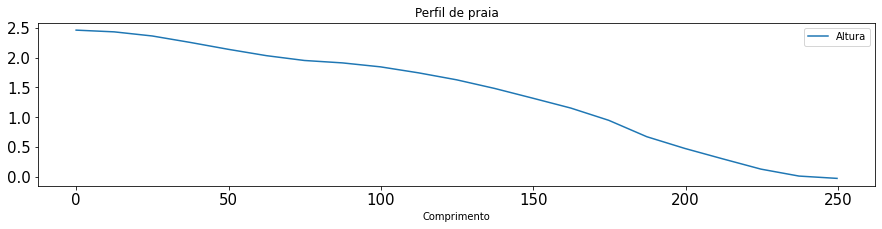

In [10]:
import matplotlib.pyplot as plt
# plotando perfis verticais para Janeiro
ax = df_perfil.plot(y='Altura',
             title='Perfil de praia',
             fontsize=15,
             legend=True,
             figsize=(15,3))

# # adicionando titulo para o plot
# plt.title('Perfil praial - exercício de python', fontsize=25)

# # adicionando labels para os eixos das abssissas e das ordenadas
# plt.xlabel('Comprimento da praia (m)', fontsize=20)
# plt.ylabel('Altura da praia (m)', fontsize=20)

# # adicionando gradeamento
# plt.grid('--', alpha=.2)

# # adicionando legenda
# plt.legend(ncol=6, bbox_to_anchor=(.99, .99))

# infelizmente o pandas, ainda, não possui um argumento para inverter o eixo y
# plt.gca().invert_yaxis()

- nem sempre é tão benéfico usar pandas
- visualização fácil durante análise exploratória
- potencial em termos de análise estatística

Mas como nem tudo é um mar de rosas, precisamos muitas vezes limpar essa planilha, lidar com caracteres acentuados, etc.

Vamos ver alguns casos, utilizando um arquivo csv de dados de terremoto.

Os dados foram retirados da seguinte fonte: https://www.analyticsvidhya.com/blog/2021/05/seismic-analysis-with-python/

In [11]:
# se estiver no google colab, rode:
!wget --directory-prefix=../dados/ https://raw.githubusercontent.com/nilodna/python-basico/feature_iojr-shortcourse/dados/pnboia_vitoria.csv

--2021-11-25 17:48:45--  https://raw.githubusercontent.com/nilodna/python-basico/feature_iojr-shortcourse/dados/pnboia_vitoria.csv
Resolvendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Conectando-se a raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 200 OK
Tamanho: 4162501 (4,0M) [text/plain]
Salvando em: “../dados/pnboia_vitoria.csv.1”

pnboia_vitoria.csv. 100%[===================>]   3,97M  5,13MB/s    em 0,8s    

2021-11-25 17:48:46 (5,13 MB/s) - “../dados/pnboia_vitoria.csv.1” salvo [4162501/4162501]



In [12]:
# leitura do arquivo
df = pd.read_csv('../Dados/database.csv')

df

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,-9999.0,-9999.0,6.0,MW,...,-9999.0,-9999.00,-9999.000,-9999.0,-9999.0000,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,-9999.0,-9999.0,5.8,MW,...,-9999.0,-9999.00,-9999.000,-9999.0,-9999.0000,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,-9999.0,-9999.0,6.2,MW,...,-9999.0,-9999.00,-9999.000,-9999.0,-9999.0000,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,-9999.0,-9999.0,5.8,MW,...,-9999.0,-9999.00,-9999.000,-9999.0,-9999.0000,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,-9999.0,-9999.0,5.8,MW,...,-9999.0,-9999.00,-9999.000,-9999.0,-9999.0000,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,-9999.0,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,-9999.0,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,-9999.0,5.9,MWW,...,-9999.0,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,-9999.0,6.3,MWW,...,-9999.0,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [13]:
# descrição em termos estatísticos
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000,23412.000000
mean,1.679033,39.639961,70.767911,-8092.806027,-6884.479156,5.882531,-9859.341001,-8898.584401,-6867.911216,-9313.676225,-9504.907135,-2587.399310
std,30.113183,125.511959,122.651898,3928.948942,4723.177128,0.423066,1173.462629,3137.969855,4652.264633,2527.032797,2168.017307,4380.087952
min,-77.080000,-179.997000,-1.100000,-9999.000000,-9999.000000,5.500000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,-18.653000,-76.349750,14.522500,-9999.000000,-9999.000000,5.600000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
50%,-3.568500,103.982000,33.000000,-9999.000000,-9999.000000,5.700000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,0.930000
75%,26.190750,145.026250,54.000000,-9999.000000,115.000000,6.000000,-9999.000000,-9999.000000,22.000000,-9999.000000,-9999.000000,1.100000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [14]:
# informações em termos computacionais: tipo das colunas, nomes, quantidade de linhas, etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 23412 non-null  float64
 7   Depth Seismic Stations      23412 non-null  float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23412 non-null  object 
 10  Magnitude Error             23412 non-null  float64
 11  Magnitude Seismic Stations  23412 non-null  float64
 12  Azimuthal Gap               23412 non-null  float64
 13  Horizontal Distance         234

- temos muita informação neste conjunto
- podemos selecionar estas informações durante a leitura do arquivo
- explorar metadados

#### Opções durante leitura do arquivo

- `skiprows`: pular, durante a leitura, uma quantidade de linhas
- `sheet_name`: para ler uma aba específica de uma planilha excel

- `sep`: qual o separador ou delimitador do arquivo (padrão ;)

- `header`: qual linha deve ser utilizada para nomear colunas
- `names`: nomear colunas manualmente

- `usecols`: selecionar quais colunas devem ser lidas (utiliza-se números inteiros)

- `index_col`: indicar qual coluna deve ser o índice

- `encoding` (utf8 padrão e latin1 para ç à é î ã): para casos com caracteres acentuados

- `decimal`: substitui virgulas por ponto, porém use com cautela!

In [15]:
df = pd.read_csv('../Dados/database.csv', 
                 usecols=[0,2,3,7], index_col=0,)

df.tail() # de forma análoga existe o .head()

,Latitude,Longitude,Depth Seismic Stations
Date,,,
12/28/2016,38.3917,-118.8941,40.0
12/28/2016,38.3777,-118.8957,33.0
12/28/2016,36.9179,140.4262,-9999.0
12/29/2016,-9.0283,118.6639,-9999.0
12/30/2016,37.3973,141.4103,-9999.0


Em alguns casos, porém:

- valores invalido possuem outro caracter (ex: -9999)
- substituímos usando o método .replace()
- inserimos np.nan no lugar

In [16]:
df = df.replace(-9999.0, np.nan)
df.tail() # porém é um float:

,Latitude,Longitude,Depth Seismic Stations
Date,,,
12/28/2016,38.3917,-118.8941,40.0
12/28/2016,38.3777,-118.8957,33.0
12/28/2016,36.9179,140.4262,NaN
12/29/2016,-9.0283,118.6639,NaN
12/30/2016,37.3973,141.4103,NaN


In [17]:
print(np.nan)
type(np.nan)

nan


float

## Removendo dados

- `.drop()`: remove dados específicos, indicando index/coluna

In [18]:
df.drop(['Depth Seismic Stations'], axis=1).head()

,Latitude,Longitude
Date,,
01/02/1965,19.246,145.616
01/04/1965,1.863,127.352
01/05/1965,-20.579,-173.972
01/08/1965,-59.076,-23.557
01/09/1965,11.938,126.427


## Removendo dados

- `.drop()`: remove dados específicos, indicando index/coluna
- `.dropna()`: remove valores faltantes (not-a-number)

In [19]:
df.dropna(axis=1, how='all')

,Latitude,Longitude,Depth Seismic Stations
Date,,,
01/02/1965,19.2460,145.6160,NaN
01/04/1965,1.8630,127.3520,NaN
01/05/1965,-20.5790,-173.9720,NaN
01/08/1965,-59.0760,-23.5570,NaN
01/09/1965,11.9380,126.4270,NaN
...,...,...,...
12/28/2016,38.3917,-118.8941,40.0
12/28/2016,38.3777,-118.8957,33.0
12/28/2016,36.9179,140.4262,NaN


## Removendo dados

- `.drop()`: remove dados específicos, indicando index/coluna
- `.dropna()`: remove valores faltantes (not-a-number)
- `.fillna()`: preenche valores faltantes usando alguns métodos

In [20]:
help(df.fillna)

Help on method fillna in module pandas.core.frame:

fillna(value=None, method=None, axis=None, inplace=False, limit=None, downcast=None) -> Union[ForwardRef('DataFrame'), NoneType] method of pandas.core.frame.DataFrame instance
    Fill NA/NaN values using the specified method.
    
    Parameters
    ----------
    value : scalar, dict, Series, or DataFrame
        Value to use to fill holes (e.g. 0), alternately a
        dict/Series/DataFrame of values specifying which value to use for
        each index (for a Series) or column (for a DataFrame).  Values not
        in the dict/Series/DataFrame will not be filled. This value cannot
        be a list.
    method : {'backfill', 'bfill', 'pad', 'ffill', None}, default None
        Method to use for filling holes in reindexed Series
        pad / ffill: propagate last valid observation forward to next valid
        backfill / bfill: use next valid observation to fill gap.
    axis : {0 or 'index', 1 or 'columns'}
        Axis along whi

In [21]:
df.fillna(method='pad').tail() #pad

,Latitude,Longitude,Depth Seismic Stations
Date,,,
12/28/2016,38.3917,-118.8941,40.0
12/28/2016,38.3777,-118.8957,33.0
12/28/2016,36.9179,140.4262,33.0
12/29/2016,-9.0283,118.6639,33.0
12/30/2016,37.3973,141.4103,33.0


### Série temporal

- sequência de informações
- observações, modelagem, reanálise
- eixo temporal igualmente espaçado
- explorar inconsistências
- corrigir
- analisar

Eixo temporal (DatetimeIndex)

- pacote: datetime
- pacote: dateutil
- pacote: pandas

In [22]:
# importando os pacotes
import datetime
import dateutil
import pandas as pd

# criando algumas variáveis
agora = datetime.datetime.now()

# checando o tipo de variável
print(type(agora))

agora

<class 'datetime.datetime'>


datetime.datetime(2021, 11, 25, 17, 48, 48, 119152)

- `datetime.datetime`
- adicionar/subtrair
- `timedelta`

In [23]:
ontem = agora - datetime.timedelta(days=1)
print(ontem)

ontem = agora - datetime.timedelta(hours=24)
print(ontem)

ontem = agora - datetime.timedelta(seconds=86400)
print(ontem)

2021-11-24 17:48:48.119152
2021-11-24 17:48:48.119152
2021-11-24 17:48:48.119152


In [24]:
amanha = agora + datetime.timedelta(days=1)
print(amanha)

amanha = agora + datetime.timedelta(hours=24)
print(amanha)

amanha = agora + datetime.timedelta(seconds=86400)
print(amanha)

2021-11-26 17:48:48.119152
2021-11-26 17:48:48.119152
2021-11-26 17:48:48.119152


- durante análise de dados: YYYY-mm-dd HH:MM:SS
- formatar saída
- `.strftime()`
- opções: https://strftime.org/

In [25]:
# todas as datas em decimais
print(agora.strftime('%d %B %Y %H:%M:%S'))

# # mês abreviado
print(agora.strftime('%d/%b/%Y %H:%M:%S'))

# # dia da semana
print(agora.strftime('%A'))

# # número do dia no ano 
print(agora.strftime('%j'))

25 November 2021 17:48:48
25/Nov/2021 17:48:48
Thursday
329


- `10 Jan 2001 13:15:00`
- datetime não converte
- `dateutil.parser.parse`
- documentação: https://dateutil.readthedocs.io/en/stable/

In [26]:
data_baguncada = '10 Jan 2001 13:15:00'

# datetime.datetime(data_baguncada)

In [27]:
data = dateutil.parser.parse(data_baguncada)

print(type(data_baguncada))
print(type(data))
print(data)

<class 'str'>
<class 'datetime.datetime'>
2001-01-10 13:15:00


## Mas como trabalhar com datas em uma série temporal longa?

- pandas: ferramentas internas
- depende do arquivo
- Nos dados de terremoto podemos utilizar dois métodos:
    - conversão do date + time: 01/02/1965 	13:44:18

In [28]:
# leitura do arquivo
df = pd.read_csv('../Dados/database.csv',
                 usecols=[0,1],
                skiprows=np.arange(3000,23413))

df.head()

,Date,Time
0,01/02/1965,13:44:18
1,01/04/1965,11:29:49
2,01/05/1965,18:05:58
3,01/08/1965,18:49:43
4,01/09/1965,13:32:50


Conveter: Date + Time

In [29]:
# extraindo primeira linha para visualização apenas
linha1 = df.iloc[0:1]
linha1

,Date,Time
0,01/02/1965,13:44:18


In [30]:
t = linha1['Date'][0] + ' ' + linha1['Time'][0]
t
# dateutil.parser.parse(t)

'01/02/1965 13:44:18'

In [31]:
# funcao: será utilizada no date_parser
def date_parse(x, y):
    return pd.datetime.strptime(f"{x} {y}", '%m/%d/%Y %H:%M:%S')

# podemos usar funções lambda
# date_parse = lambda x: pd.datetime.strptime(x, '%Y %m %d %H %M')

df = pd.read_csv('../Dados/database.csv',
                skiprows=np.arange(3000,23413),
                parse_dates={'datetime': ['Date', 'Time']},
                date_parser=date_parse,
                 )

df.head()

,datetime,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,1965-01-02 13:44:18,19.246,145.616,Earthquake,131.6,-9999.0,-9999.0,6.0,MW,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,1965-01-04 11:29:49,1.863,127.352,Earthquake,80.0,-9999.0,-9999.0,5.8,MW,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,1965-01-05 18:05:58,-20.579,-173.972,Earthquake,20.0,-9999.0,-9999.0,6.2,MW,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,1965-01-08 18:49:43,-59.076,-23.557,Earthquake,15.0,-9999.0,-9999.0,5.8,MW,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,1965-01-09 13:32:50,11.938,126.427,Earthquake,15.0,-9999.0,-9999.0,5.8,MW,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


#### Notem:

- nova coluna
- antigas colunas de tempo não existem mais



In [32]:
# agora podemos converter nossa coluna datetime em index
df.set_index('datetime', inplace=True)

df.head()

,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
datetime,,,,,,,,,,,,,,,,,,,
1965-01-02 13:44:18,19.246,145.616,Earthquake,131.6,-9999.0,-9999.0,6.0,MW,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-04 11:29:49,1.863,127.352,Earthquake,80.0,-9999.0,-9999.0,5.8,MW,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-05 18:05:58,-20.579,-173.972,Earthquake,20.0,-9999.0,-9999.0,6.2,MW,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-08 18:49:43,-59.076,-23.557,Earthquake,15.0,-9999.0,-9999.0,5.8,MW,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
1965-01-09 13:32:50,11.938,126.427,Earthquake,15.0,-9999.0,-9999.0,5.8,MW,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


### Criando eixo temporal do zero

- data de início
- data final
- frequência temporal
- `pd.date_range()`



In [33]:
# frequência horária, diária, mensal
eixo_temporal_metodo1 = pd.date_range(start='2020-10-20 00', 
                              end='2020-11-20 00',
                              freq='5D')

eixo_temporal_metodo2 = pd.date_range(start='2021-07-15 00:00', periods=180, freq='1D')

eixo_temporal_metodo1

DatetimeIndex(['2020-10-20', '2020-10-25', '2020-10-30', '2020-11-04',
               '2020-11-09', '2020-11-14', '2020-11-19'],
              dtype='datetime64[ns]', freq='5D')

## Exemplo

### Conjunto de dados do IBAMA: localidades afetadas pela mancha de óleo em 2019

- Vamos fazer leitura de arquivo excel
- limpar e ajustar do conjunto de dados

In [34]:
# leitura do arquivo
url = "http://www.ibama.gov.br/phocadownload/emergenciasambientais/2019/manchasdeoleo/2019-12-02_LOCALIDADES_AFETADAS.xlsx"
df = pd.read_excel(
                    url,
                    parse_dates=["Data_Avist", "Data_Revis"],
                  )
df

,geocodigo,localidade,loc_id,municipio,estado,sigla_uf,Data_Avist,Data_Revis,Status,Latitude,Longitude
0,3201605,Praia de Guriri,3201605_43,Conceição da Barra,Espírito Santo,ES,2019-11-23,2019-11-23,Oleada - Vestigios / Esparsos,"18° 40' 43.70"" S","39° 44' 33.69"" W"
1,3201605,Praia de Guriri,3201605_46,Conceição da Barra,Espírito Santo,ES,2019-11-18,2019-11-19,Oleada - Vestigios / Esparsos,"18° 42' 14.87"" S","39° 44' 45.92"" W"
2,3201605,Praia de Guriri,3201605_45,Conceição da Barra,Espírito Santo,ES,2019-11-21,2019-11-27,Oleada - Vestigios / Esparsos,"18° 41' 54.57"" S","39° 44' 40.31"" W"
3,2207702,Praia do Pontal,2207702_4,Parnaíba,Piauí,PI,2019-11-08,2019-11-17,Oleada - Vestigios / Esparsos,"2° 45' 46.58"" S","41° 46' 54.03"" W"
4,3202405,Praia do Morro,3202405_39,Guarapari,Espírito Santo,ES,2019-11-28,2019-11-28,Oleada - Vestigios / Esparsos,"20° 39' 18.19"" S","40° 28' 42.74"" W"
...,...,...,...,...,...,...,...,...,...,...,...
861,3203205,Praia de Povoação,3203205_61,Linhares,Espírito Santo,ES,2019-11-18,2019-11-23,Oleada - Vestigios / Esparsos,"19° 31' 6.060"" S","39° 45' 11.32"" W"
862,3201605,Praia Pontal do Sul,3201605_40,Conceição da Barra,Espírito Santo,ES,2019-11-14,2019-11-30,Oleada - Vestigios / Esparsos,"18° 39' 5.425"" S","39° 44' 18.42"" W"
863,3201605,Praia Pontal do Sul,3201605_42,Conceição da Barra,Espírito Santo,ES,2019-11-16,2019-11-18,Oleada - Vestigios / Esparsos,"18° 40' 3.646"" S","39° 44' 30.02"" W"
864,3201605,Praia Pontal do Sul,3201605_41,Conceição da Barra,Espírito Santo,ES,2019-11-26,2019-11-26,Oleada - Vestigios / Esparsos,"18° 39' 38.00"" S","39° 44' 24.91"" W"


**Vamos tentar fazer algumas coisasinhas aqui:**

- Utilizando groupby, count e plot, monte um gráfico de barras e responda: qual o Estado mais afetado segundo o conjunto de dados?

In [35]:
# Calculando o tempo de permanência da mancha em cada localidade
df["dias"] = (df["Data_Revis"] - df["Data_Avist"]).dt.days

In [36]:
# tratando as colunas de tempo
df['Data_Avist'] = df['Data_Avist'].dt.strftime('%Y-%m-%d').str.replace('NaT', 'na')
df["Data_Revis"] = df["Data_Revis"].dt.strftime("%Y-%m-%d").str.replace("NaT", "na")
df["dias"] = df["dias"].astype('Int64').astype(str).str.replace("nan", "na")

In [37]:
df.dropna(inplace=True)
df.head()

,geocodigo,localidade,loc_id,municipio,estado,sigla_uf,Data_Avist,Data_Revis,Status,Latitude,Longitude,dias
0,3201605,Praia de Guriri,3201605_43,Conceição da Barra,Espírito Santo,ES,2019-11-23,2019-11-23,Oleada - Vestigios / Esparsos,"18° 40' 43.70"" S","39° 44' 33.69"" W",0
1,3201605,Praia de Guriri,3201605_46,Conceição da Barra,Espírito Santo,ES,2019-11-18,2019-11-19,Oleada - Vestigios / Esparsos,"18° 42' 14.87"" S","39° 44' 45.92"" W",1
2,3201605,Praia de Guriri,3201605_45,Conceição da Barra,Espírito Santo,ES,2019-11-21,2019-11-27,Oleada - Vestigios / Esparsos,"18° 41' 54.57"" S","39° 44' 40.31"" W",6
3,2207702,Praia do Pontal,2207702_4,Parnaíba,Piauí,PI,2019-11-08,2019-11-17,Oleada - Vestigios / Esparsos,"2° 45' 46.58"" S","41° 46' 54.03"" W",9
4,3202405,Praia do Morro,3202405_39,Guarapari,Espírito Santo,ES,2019-11-28,2019-11-28,Oleada - Vestigios / Esparsos,"20° 39' 18.19"" S","40° 28' 42.74"" W",0


In [38]:
# um pouco de limpeza de dados (data cleaning)

# removendo linhas onde o status == nao observado
filtr = (df['Status'] == 'Oleo Nao Observado')
df = df[~filtr].copy()

# removendo registros onde o dias == 0
filtr = (df['dias'] == 0)
df = df[~filtr].copy()

df.head()

,geocodigo,localidade,loc_id,municipio,estado,sigla_uf,Data_Avist,Data_Revis,Status,Latitude,Longitude,dias
0,3201605,Praia de Guriri,3201605_43,Conceição da Barra,Espírito Santo,ES,2019-11-23,2019-11-23,Oleada - Vestigios / Esparsos,"18° 40' 43.70"" S","39° 44' 33.69"" W",0
1,3201605,Praia de Guriri,3201605_46,Conceição da Barra,Espírito Santo,ES,2019-11-18,2019-11-19,Oleada - Vestigios / Esparsos,"18° 42' 14.87"" S","39° 44' 45.92"" W",1
2,3201605,Praia de Guriri,3201605_45,Conceição da Barra,Espírito Santo,ES,2019-11-21,2019-11-27,Oleada - Vestigios / Esparsos,"18° 41' 54.57"" S","39° 44' 40.31"" W",6
3,2207702,Praia do Pontal,2207702_4,Parnaíba,Piauí,PI,2019-11-08,2019-11-17,Oleada - Vestigios / Esparsos,"2° 45' 46.58"" S","41° 46' 54.03"" W",9
4,3202405,Praia do Morro,3202405_39,Guarapari,Espírito Santo,ES,2019-11-28,2019-11-28,Oleada - Vestigios / Esparsos,"20° 39' 18.19"" S","40° 28' 42.74"" W",0


### Agrupamento (groupby)

- chaves (keys): grupos
- eixo (axis, 0 para linhas, 1 para colunas)
- método estatístico a ser utilizado no agrupamento (sum, mean, max, min, etc)

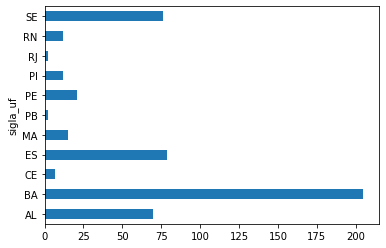

In [39]:
# Estado mais afetado
df.groupby('sigla_uf').count()['estado'].plot(kind='barh')

- Da mesma forma, mas sem necessidade de figura, agrupe por Município e apresente quais foram os 10 mais afetados

In [40]:
# Município mais afetado
df.groupby('municipio').count()\
        .sort_values(by='dias', 
                     ascending=False)\
        .head(10)

,geocodigo,localidade,loc_id,estado,sigla_uf,Data_Avist,Data_Revis,Status,Latitude,Longitude,dias
municipio,,,,,,,,,,,
São Mateus,29,29,29,29,29,29,29,29,29,29,29
Ilhéus,22,22,22,22,22,22,22,22,22,22,22
Conceição da Barra,21,21,21,21,21,21,21,21,21,21,21
Aracaju,20,20,20,20,20,20,20,20,20,20,20
Linhares,19,19,19,19,19,19,19,19,19,19,19
Prado,19,19,19,19,19,19,19,19,19,19,19
Piaçabuçu,19,19,19,19,19,19,19,19,19,19,19
Porto Seguro,18,18,18,18,18,18,18,18,18,18,18
Estância,18,18,18,18,18,18,18,18,18,18,18


- Filtre o conjunto de dados para identificar as primeiras e últimas localidades afetadas.

In [41]:
# primeiros afetados
filtr = (df['Data_Avist'] == df.min()['Data_Avist'])
df[filtr].head(5)

,geocodigo,localidade,loc_id,municipio,estado,sigla_uf,Data_Avist,Data_Revis,Status,Latitude,Longitude,dias
666,2511905,Praia de Tambaba,2511905_1,Pitimbu,Paraíba,PB,2019-08-30,2019-11-26,Oleada - Vestigios / Esparsos,"7° 22' 9.569"" S","34° 47' 54.76"" W",88


In [42]:
# ultimos afetados
df[df['Data_Avist'] == df.max()['Data_Avist']].sort_values(by='dias', ascending=False).head(5)

,geocodigo,localidade,loc_id,municipio,estado,sigla_uf,Data_Avist,Data_Revis,Status,Latitude,Longitude,dias
244,2112506,Arpoador,2112506_12,Tutóia,Maranhão,MA,2019-12-02,2019-12-02,Oleada - Vestigios / Esparsos,"2° 42' 54.07"" S","42° 25' 52.01"" W",0
245,3205309,Praia de Camburi,3205309_8,Vitória,Espírito Santo,ES,2019-12-02,2019-12-02,Oleada - Vestigios / Esparsos,"20° 17' 0.801"" S","40° 17' 20.19"" W",0
282,2112506,Tutoia,2112506_19,Tutóia,Maranhão,MA,2019-12-02,2019-12-02,Oleada - Manchas,"2° 45' 15.91"" S","42° 18' 56.21"" W",0
300,2112506,Tutoia,2112506_21,Tutóia,Maranhão,MA,2019-12-02,2019-12-02,Oleada - Manchas,"2° 45' 6.530"" S","42° 20' 2.558"" W",0
446,2414209,Fortaleza dos reis Magos,2414209_13,Tibau do Sul,Rio Grande do Norte,RN,2019-12-02,2019-12-02,Oleada - Vestigios / Esparsos,"6° 14' 9.454"" S","35° 2' 17.89"" W",0


- Por fim, qual a localidade afetada por mais tempo?

In [43]:
# afetados por mais tempo
df['localidade'] = df['localidade'].astype(str)
df['dias'] = df['dias'].astype(int)

df.groupby(by='localidade').sum().sort_values('dias', ascending=False)[['dias']].head(5)

,dias
localidade,
Praia da Costa,148
Atalaia,113
Praia de Flexeiras,108
Praia de Jatobá,97
Atalaia Nova,90
